In [1]:
#本章需导入的模块
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.model_selection import train_test_split,KFold
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import svm
import os

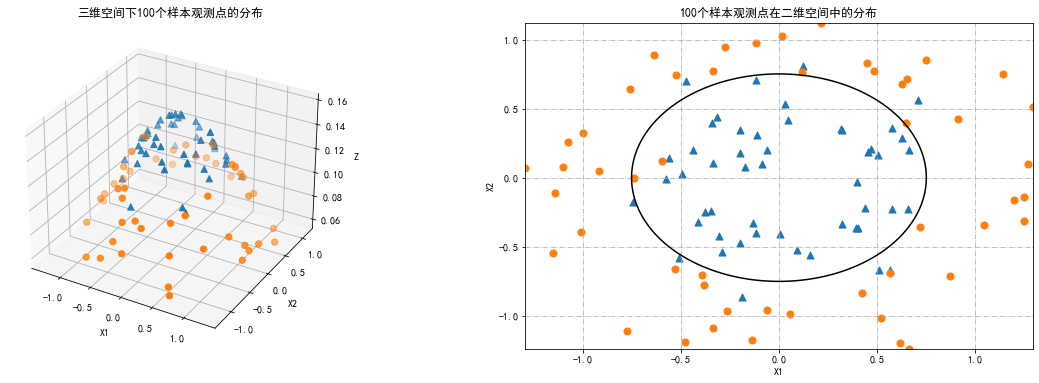

In [2]:
N=100
X,Y=make_circles(n_samples=N,noise=0.2,factor=0.5,random_state=123)
fig = plt.figure(figsize=(20,6))
markers=['^','o']
ax = fig.add_subplot(121, projection='3d')
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
Z=np.zeros((len(X),))
for i,x in enumerate(X):
    Z[i]=var.pdf(x)
for k,m in zip([1,0],markers):
    ax.scatter(X[Y==k,0],X[Y==k,1],Z[Y==k],marker=m,s=40)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
ax.set_title('三维空间下100个样本观测点的分布')  

ax = fig.add_subplot(122)
X1,X2= np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),500),np.linspace(X[:,1].min(),X[:,1].max(),500))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))
Z=np.zeros((len(X0),))
for i,x in enumerate(X0):
    Z[i]=var.pdf(x)
for k,m in zip([1,0],markers):
    ax.scatter(X[Y==k,0],X[Y==k,1],marker=m,s=50)
ax.set_title("100个样本观测点在二维空间中的分布")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.grid(True,linestyle='-.')
contour = plt.contour(X1,X2,Z.reshape(len(X1),len(X2)),[0.12],colors='k')
#ax.clabel(contour,fontsize=10,colors=('k'))  #等高线上标明z（即高度）的值




代码说明：
（1）第18至20行：为绘图准备数据：数据为在输入变量取值范围内的250000个样本观测点。
（2）第21，22行：将250000个样本观测映射到三空间中（非线性函数为二元高斯函数）。
（3）第23，24行：在原来的二维空间中展示样本观测的分布特点。并基于三维空间中的250000个样本观测点绘制其等高线图，展示三维空间中的点投影到二维平面上的分布特征。如图8.11右图所示。图形显示，三维空间中可将两类分开的一个平面（横切面）与二维空间中的曲线相对应，可间接实现对二维空间中非线性样本的分割。
